In [55]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Lab 6: Modeling, Summary Statistics and Loss Functions

In this lab, you will:

1. Define loss functions and find the arguments that minimize them.
2. Explore different statistics and techniques for optimization.

**This assignment should be completed and submitted by Monday, Oct 5th, 2020 at 11:59 PM**.


### Collaboration Policy

Data science is a collaborative activity. While you may talk to others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*

## Constant Model and Loss Functions

### Constant Model

In the modeling context, $y$ represents our "true observations", which are typically what we are trying to model. $\hat{y}$ represents our prediction (for any model). In this lab, we will use the constant model, where our prediction for any input is a constant:

$$\Large
\hat{y} = \theta
$$

$\theta$ is what we call a **parameter**. Our goal is to find the value of our parameters that **best fit our data**. We represent the optimal parameter(s) with $\hat{\theta}$.

We call the constant model a **summary statistic**, as we are determining one number that best "summarizes" a set of values.


### Loss function

Loss functions are what we use to determine the optimal parameter(s) for our model.

A loss function is a measure of how well a model is able to predict the expected outcome. In other words, it measures the deviations of the predicted values from the observed values. In this lab we will implement the squared loss and absolute loss functions.  

In the formulations below $y$ represents the observed values and $\hat{y}$ stands for our prediction.

1. **Squared Loss** (also known as the $L_2$ loss, pronounced "ell-two"):

$$\Large L(y, \hat{y}) = (y - \hat{y})^2$$

2. **Absolute Loss** (also known as the $L_1$ loss, pronounced "ell-one"):

$$\Large L\left(y, \hat{y} \right) = \left| y - \hat{y} \right|$$

Since we are using the constant model $\hat{y} = \theta$ for the remainder of the lab, we will instead refer to these loss functions as being $(y - \theta)^2$ and $|y - \theta|$.

In [56]:
# Run this cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

## Squared Loss

### Question 1a: Implement the squared loss function


$$\Large
L\left(y,  \theta \right) = \left( y - \theta \right)^2
$$

Based on the comments below, implement the squared loss function. Your answer should not use any loops.

<!--
BEGIN QUESTION
name: q1a
-->

In [57]:
def squared_loss(y_obs, theta):
    """
    Calculate the squared loss of the observed data and a summary statistic.
    
    Parameters
    ------------
    y_obs: an observed value
    theta : some constant representing a summary statistic
    
    Returns
    ------------
    The squared loss between the observation and the summary statistic.
    """
    return (y_obs - theta) ** 2

In [58]:
grader.check("q1a")

All tests passed!

### Question 1b: Plotting the Squared Loss

<!-- BEGIN QUESTION -->

Let us now consider the case where `y_obs` equals 10. For arbitrary values of `theta`, plot the squared loss using the function you implemented in the previous question. Don't forget to label your graph.

<!--
BEGIN QUESTION
name: q1b
manual: true
-->

Text(0.5, 1.0, 'L2 Loss for different values of $\\theta$')

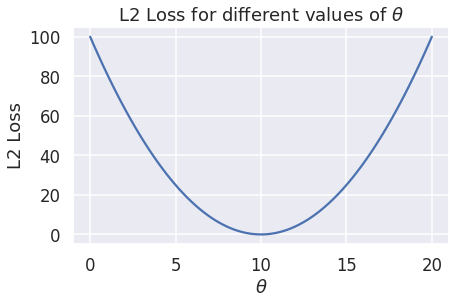

In [59]:
y_obs = 10
theta_values = np.linspace(0, 20, 100) # some arbitrary values of theta

plt.plot(theta_values, squared_loss(y_obs, theta_values))
plt.xlabel(r'$\theta$')
plt.ylabel('L2 Loss')
plt.title(r'L2 Loss for different values of $\theta$')

<!-- END QUESTION -->



## Question 2: Mean Squared Error for the Tips Data

Let's apply our knowledge to some real world data. Below you are given an array of tips from a restaurant. In this section, you will try to find the best statistic $\theta$ to represent the tips given in the array. The simple procedure you will use in this lab includes constructing the mean squared error (MSE) for the tips data and finding the value that minimizes the MSE. 

In [60]:
# Run this cell, do not change anything
df = sns.load_dataset("tips")
tips = np.array(df['tip']) # array of observed tips

### Question 2a

Now, we can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large\mathcal{D} = \{y_1, \ldots, y_n\}$$

where $y_i$ is the $i^{th}$ tip.

We can define the average loss over the dataset as:

$$\Large
R\left(\theta\right) = \frac{1}{n} \sum_{i=1}^n L(y_i, \theta)
$$

Define the `mean_squared_error` function which computes the mean squared error given the data and a value for `theta`. Assume that `data` will be a numpy array.

<!--
BEGIN QUESTION
name: q2a
manual: false
-->

In [61]:
def mean_squared_error(theta, data):
    return np.mean(squared_loss(data, theta))

mean_squared_error(5.3, tips)

7.20452950819672

In [62]:
grader.check("q2a")

All tests passed!

### Question 2b

<!-- BEGIN QUESTION -->

In the cell below plot the mean squared error for different `theta` values. Note that `theta_values` are given. Make sure to label the axes on your plot. Remember to use the `tips` variable we defined earlier.

<!--
BEGIN QUESTION
name: q2b
manual: true
-->

Text(0.5, 1.0, 'MSE for different values of $\\theta$')

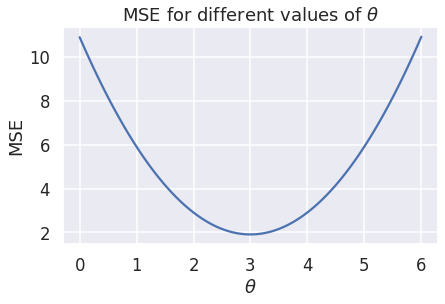

In [63]:
theta_values = np.linspace(0, 6, 100)
mse = [mean_squared_error(theta, tips) for theta in theta_values]

plt.plot(theta_values, mse)
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.title(r'MSE for different values of $\theta$')

<!-- END QUESTION -->



### Question 2c

Find the value of `theta` that minimizes the L2 loss above via observation of the plot you've generated. Round your answer to the nearest integer.

<!--
BEGIN QUESTION
name: q2c
-->

In [64]:
min_observed_mse = 3
min_observed_mse

3

In [65]:
grader.check("q2c")

All tests passed!

## Question 3: Find the Minimizing Value for Our Tips Dataset

The cell below plots some arbitrary 4th degree polynomial function. 

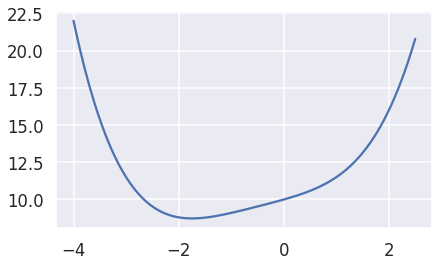

In [66]:
x_values = np.linspace(-4, 2.5, 100)

def fx(x):
    return 0.1 * x**4 + 0.2*x**3 + 0.2 * x **2 + 1 * x + 10

plt.plot(x_values, fx(x_values));

By looking at the plot, we see that the x which minimizes the function is slightly larger than -2. What if we want the exact value?

The function `minimize` from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) will attempt to minimize any function you throw at it.

Try running the cell below, and you will see that minimize seems to get the answer correct.

Note: For today, we'll let minimize work as if by magic. We'll discuss how `minimize` works later in the course.

In [67]:
from scipy.optimize import minimize
minimize(fx, x0 = 1.1)

      fun: 8.728505719866614
 hess_inv: array([[0.50884886]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-1.74682779])

The `fun` value is the minimum value of the function. The `x` is the x which minimizes the function. We can index into the object returned by `minimize` to get these values. We have to add the additional `[0]` at the end because the minimizing x is returned as an array, but this is not necessarily the case for other attributes (i.e. `fun`). The reason for this is that `minimize` can also minimize multivariable functions.

In [68]:
minimization_result_for_fx = minimize(fx, x0 = 0)
min_of_fx = minimization_result_for_fx['fun']
x_which_minimizes_fx = minimization_result_for_fx['x'][0]

The parameter `x0` that we passed to the `minimize` function is where the `minimize` function starts looking as it tries to find the minimum. For example, above, `minimize` started its search at x = 1.1 because that's where we told it to start. For the function above, it doesn't really matter what x we start at because the function is nice and has only a single local minimum. More technically, the function is nice because it is [convex](https://en.wikipedia.org/wiki/Convex_function), a property of functions that we will discuss later in the course.

`minimize` isn't perfect. For example, if we give it a function with many valleys (also known as local minima) it can get stuck. For example, consider the function below:

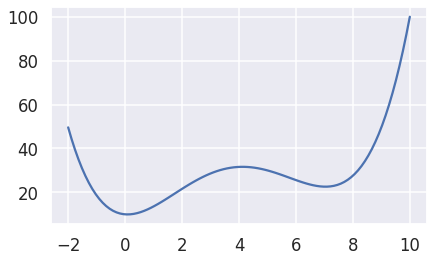

In [69]:
w_values = np.linspace(-2, 10, 100)

def fw(w):
    return 0.1 * w**4 - 1.5*w**3 + 6 * w **2 - 1 * w + 10

plt.plot(w_values, fw(w_values));

If we start the minimization at w = 6.5, we'll get stuck in the local minimum at w = 7.03. Note that no matter what your actual variable is called in your function, the `minimize` routine still calls the starting point `x0`.

In [70]:
minimize(fw, x0 = 6.5)

      fun: 22.594302881719713
 hess_inv: array([[0.12308018]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([7.03774624])

### Question 3a

Using the `minimize` function, find the value of `theta` that minimizes the mean squared error for our tips dataset. In other words, you want to find the exact minimum of the plot that you generated in question 2.

For autograding purposes, assign `min_scipy` to the value of `theta` that minimizes the MSE according to the `minimize` function.

Hint: You can't pass your `mean_squared_error` function to `minimize` because `mean_squared_error` has two variables: `theta` and `data`. `minimize` will get confused because it thinks it needs to minimize by picking the best `theta` and best `data` values. We only want it to play around with `theta`.

In other words, you need to pass a function of one variable `theta` to the `minimize` function, which means you'll need to create a new function of only ONE variable `theta`. This is very simple, but also very tricky when you do this for the first time. Make sure to ask for help if you get stuck.

<!--
BEGIN QUESTION
name: q3a
-->

In [71]:
def mean_squared_error_with_hardcoded_data(theta):
    return mean_squared_error(theta, tips)
min_scipy = minimize(mean_squared_error_with_hardcoded_data, x0=0.0)['x'][0] 
min_scipy

2.9982787346405537

In [72]:
grader.check("q3a")

All tests passed!

### Question 3b

From lecture we know that the value of `theta` that minimizes the mean squared error is the average of the data for the constant model. Assign `min_computed` to the mean of the tips dataset, and compare this to the values you observed in questions 2b and 3a.

<!--
BEGIN QUESTION
name: q3b
-->

In [73]:
min_computed = np.mean(tips)
min_computed

2.99827868852459

In [74]:
grader.check("q3b")

All tests passed!

Reflecting on the lab so far, we've now seen 3 ways to find the summary statistic `theta` that minimizes the mean squared error:
1. Create a plot of the MSE for the given data array vs. `theta` and eyeball the minimizing `theta`.
2. Create a function that returns the MSE for a specific data array as a function of `theta` and use the scipy `minimize` function to find the exact `theta` which minimizes this function.
3. Simply compute the `mean` of the data array.

At this point, you've hopefully convinced yourself that the `mean` of the data is the summary statistic that minimizes mean squared error.

## Question 4: Implement the Absolute Loss 

### Question 4a

In this section, you will follow the exact same steps as above but for the absolute loss function. Absolute loss is defined as:

$$\Large
L\left(y, \theta \right) = \left| y - \theta \right|
$$

<!--
BEGIN QUESTION
name: q4a
-->
In the cell below define the function `abs_loss` which returns the absolute loss given a value of `theta` and `y_obs`. 

In [75]:
def abs_loss(theta, y_obs):
    return np.abs(y_obs - theta)

In [76]:
grader.check("q4a")

All tests passed!

### Question 4b: Plotting the Absolute Loss

In the cell below, plot the absolute loss for different values of `theta`. Note that the values of `theta` have already been given to you.

Text(0.5, 1.0, 'L1 Loss for different values of $\\theta$')

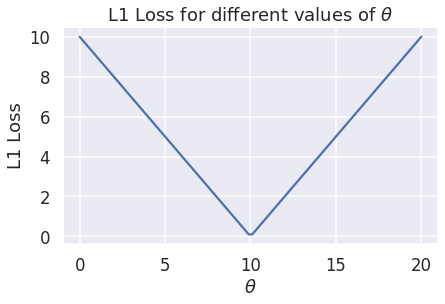

In [77]:
y_obs = 10
theta_values = np.linspace(0, 20, 100) # some arbitrary values of theta

plt.plot(theta_values, abs_loss(theta_values, y_obs))
plt.xlabel(r'$\theta$')
plt.ylabel('L1 Loss')
plt.title(r'L1 Loss for different values of $\theta$')

**Thought Question**: How are outliers penalized differently in absolute loss compared to square loss?

## Question 5: Mean Absolute Error for the Tips Data

### Question 5a

Define the `mean_absolute_error` function which computes the mean absolute error given the data and a value for `theta`. Assume that `data` will be a numpy array.

<!--
BEGIN QUESTION
name: q5a
-->

In [78]:
def mean_absolute_error(theta, data):
    # doesn't need a for loop
    return np.mean([abs_loss(theta, data) for d in data])

mean_absolute_error(5.3, tips)

2.4527868852459016

In [79]:
grader.check("q5a")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 5b

In the cell below plot the mean absolute error for different `theta` values on the `tips` dataset. Note that `theta_values` are given. Make sure to label the axes on your plot.

<!--
BEGIN QUESTION
name: q5b
manual: true
-->

Text(0.5, 1.0, 'MAE for different values of $\\theta$')

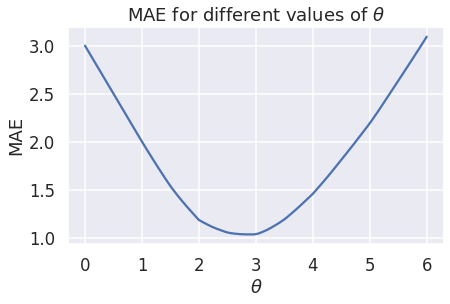

In [80]:
theta_values = np.linspace(0, 6, 100)
mae = [mean_absolute_error(theta, tips) for theta in theta_values]

plt.plot(theta_values, mae)
plt.xlabel(r'$\theta$')
plt.ylabel('MAE')
plt.title(r'MAE for different values of $\theta$')

<!-- END QUESTION -->



You should see that the plot looks somewhat similar the plot of the mean squared error. Try to identify any key differences you observe and write them down below. This might be more fun with a partner. Note, your answer will not be graded, so don't worry about writing a detailed answer. If you want to see our answer, see the very end of this lab notebook.

L2 loss is smoother than MAE loss. MAE loss looks more like a piecewise linear plot. The minimizing theta is also relatively different.

### Question 5c

To minimize the function, let's zoom in closer to the minimizing `theta`. Plot the mean absolute error again using the given `theta_values` below.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5c
manual: true
-->

Text(0.5, 1.0, 'MAE for different values of $\\theta$')

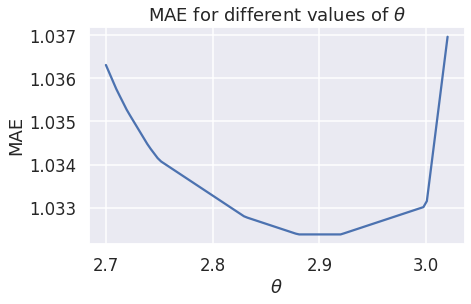

In [81]:
theta_values = np.linspace(2.7, 3.02, 100)
mae = [mean_absolute_error(theta, tips) for theta in theta_values]

plt.plot(theta_values, mae)
plt.xlabel(r'$\theta$')
plt.ylabel('MAE')
plt.title(r'MAE for different values of $\theta$')

<!-- END QUESTION -->

### Question 5d

This time, observe that the function is piecewise linear and has a slope of zero near its minimum. Because of the large flat region at the minimum, there are multiple values of `theta` that minimize the L1 loss.

Give a `theta` rounded to the nearest tenth that minimizes L1 loss. By "rounded to the nearest tenth" we mean you'd say 7.6 instead of 7.55.

<!--
BEGIN QUESTION
name: q5d
-->

In [82]:
min_observed_mae = 2.9
min_observed_mae

2.9

In [83]:
grader.check("q5d")

All tests passed!

## Question 6: Find the Minimizing Value Using Absolute Error

### Question 6a

As before, we will use the `minimize` function to find a solution. Assign `min_abs_scipy` to the value of `theta` that minimizes the MAE according to the `minimize` function for the `tips` data. Note: Depending on the `x0` value you specify, you will get different results! 

Extra: Try various `x0` values and record the different outputs you get from `minimize`. Use the plot you created above to verify that these are all valid minimizing statistics.

<!--
BEGIN QUESTION
name: q6a
-->

In [84]:
def mean_abs_error_helper(theta):
    return mean_absolute_error(theta, tips)

min_abs_scipy = minimize(mean_abs_error_helper, x0=0.0)['x'][0]
min_abs_scipy

2.8915493363426923

In [85]:
grader.check("q6a")

All tests passed!

Just like the MSE, there are three ways to compute the summary statistic `theta` that minimizes the MAE:
1. Create a plot of the MAE for the given data array vs. `theta` and eyeball a minimizing `theta`.
2. Create a function that returns the MAE for a specific data array as a function of `theta` and use the scipy `minimize` function to find an exact `theta` which minimizes this function.
3. Simply compute the ?????? of the data array.

Try to figure out what to substitute in for the ?????? above. To this, try out various statistics functions provided by `np`. A list and documentation is available at [https://docs.scipy.org/doc/numpy/reference/routines.statistics.html](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html).

### Question 6b

Assign `min_abs_computed` to the correct summary statistic using method `#3` from the previous problem.

<!--
BEGIN QUESTION
name: q6b
-->

In [86]:
min_abs_computed = np.median(tips)
min_abs_computed

2.9

In [87]:
grader.check("q6b")

All tests passed!

# Extra Notes

#### Our Observations on Differences Between MAE vs. MSE

Earlier in this lab, we said we'd describe our observations about the differences between the MAE and MSE.

There are three key differences that we identified between the plots of the MSE and MAE.

1. The minimizing $\theta$ is different.
2. The plot for MAE increases linearly instead of quadratically as we move far away from the minimizing $\theta$.
3. The plot for MAE is piecewise linear instead of smooth. Each change in slope happens at the same $\theta$ value as a data point in our dataset.

## Submission

**Important**: To make sure the test cases run correctly, click `Kernel>Restart & Run All` and make sure all of the test cases are still passing. Doing so will submit your code for you. 

If your test cases are no longer passing after restarting, you may be missing a variable, or modifications you'd made may not have been recorded (perhaps because you deleted a cell). 

You may submit this assignment as many times as you'd like before the deadline.

**You must restart and run all cells before submitting. Otherwise, you may pass test cases locally, but not on our servers. We will not entertain regrade requests of the form, “my code passed all of my local test cases, but failed the autograder”.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [88]:
grader.check_all()

q1a:

    All tests passed!
    

q2a:

    All tests passed!
    

q2c:

    All tests passed!
    

q3a:

    All tests passed!
    

q3b:

    All tests passed!
    

q4a:

    All tests passed!
    

q5a:

    All tests passed!
    

q5d:

    All tests passed!
    

q6a:

    All tests passed!
    

q6b:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [89]:
# Save your notebook first, then run this cell to export your submission.
grader.export("lab06.ipynb", pdf=False)